<a href="https://colab.research.google.com/github/Parkseojin2001/Hands-On-ML/blob/main/02_end_to_end_machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**예제 프로젝트 : 부동산 관련 문제**

```
  <주요 단계>

  1. 큰 그림 보기

  2. 데이터 구하기

  3. 데이터로부터 통찰을 얻기 위해 탐색하고 시각화하기

  4. 머신러닝 알고리즘을 위해 데이터를 준비

  5. 모델을 선택하고 훈련

  6. 모델을 상세하게 조정

  7. 솔루션을 제시

  8. 시스템을 론칭하고 모니터링하고 유지 보수하기
```

# 2.1 실제 데이터로 작업하기

StatLib 저장소에 있는 캘리포니아 주택 가격 데이터셋을 사용

<img src = "https://tensorflowkorea.files.wordpress.com/2018/05/e18489e185b3e1848fe185b3e18485e185b5e186abe18489e185a3e186ba-2018-05-30-e1848be185a9e18492e185ae-11-51-37.png?w=1250">



# 2.2 큰 그림 보기

할 일 : 캘리포니아 인구조사 데이터를 사용해 캘리포니아의 주택 가격 모델 만들기

목표 : 모델을 학습시켜 다른 측정 데이터가 주어졌을 때 구역의 중간 주택 가격을 예측

## 2.2.1 문제 정의

모델의 출력(구역의 중간 주택 가격에 대한 예측)이 여러 가지 다른 신호와 함께 다른 머신러닝 시스템에 입력으로 사용된다.

<img src = "https://tensorflowkorea.files.wordpress.com/2018/05/e18489e185b3e1848fe185b3e18485e185b5e186abe18489e185a3e186ba-2018-05-31-e1848be185a9e1848ce185a5e186ab-10-42-47.png">

```
  파이프 라인(pipeline)
  - 데이터 처리 컴포넌트(component)들이 연속되어 있는 것을 의미한다.
  
  - 머신러닝 시스템은 데이터를 조작하고 변환할 일이 많아 자주 사용한다.
```

**문제 정의**
- 지도 학습, 비지도 학습, 강화 학습 중 무엇일까?

- 분류나 회귀인가 아니면 다른 어떤 작업인가?

- 배치 학습과 온라인 학습 중 어느 것을 사용해야 되나?

```
  - 레이블된 훈련 샘플이 있으므로 지도 학습 작업이다.

  - 값을 예측해야 하므로 회귀 문제(사용할 특성이 여러 개이므로 구체적으로
  다중 회귀)이며 각 구역마다 하나의 값을 예측하므로 단변량 회귀 문제이다.

  - 시스템으로 들어오는 데이터에 연속적인 흐름이 없으므로 빠르게 변하는 데이터에 적응하지 않아도 되고, 데이터가 메모리에 들어갈 만큼 충분히 작으므로 배칙 학습이다.

```

## 2.2.2 성능 측정 지표 선택

**평균 제곱 오차(RMSE - root mean sqare error)** : 회귀 문제의 전형적인 성능 지표로 오차가 커질수록 이 값은 더욱 커지므로 예측에 얼마난 많은 오류가 있는지 가늠하게 해준다.

$$RMSE(X, h) = \sqrt{\frac{1}{m}\sum_{i = 1}^m(h(x^{(i)})-y^{(i)})^2}$$

**평균 절대 오차(MAE - mean absolute error)** : 이상치로 보이는 구역이 많은 경우

$$\text{MAE}(\boldsymbol{X},h) = \frac{1}{m} \sum_{i=1}^m |h(\boldsymbol{x^{(i)}}) - y^{(i)}|$$

RMSE와 MAE의 공통점 : 예측값의 벡터와 타깃값의 벡터 사이의 거리를 재는 방법이다.


## 2.2.3 가정 검사

마지막으로 지금까지 만든 가정을 나열하고 검사해보는 것이 좋다.

```
ex. 시스템이 출력한 구역의 가격이 머신러닝 시스템의 입력으로 들어가게 되는데 이 값이 있는 그대로 사용될 거라 가정.
But, 하위 시스템에서 이 값을 ('저렴', '보통', '고가' 같은) 카테고리로 바꾸고 가격 대신 카테고리를 사용할 경우에 이는 회귀문제가 아니라 분류 문제로 바뀌는 문제가 발생
```

# 2.3 데이터 가져오기

## 2.3.1 작업 환경 만들기

필요한 파이썬 패키지: 주피터, 넘파이, 판다스, 맷플롯립, 사이킷런

## 2.3.2 데이터 다운로드

In [1]:
# 데이터 추출하는 함수
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
  os.makedirs(housing_path, exist_ok = True)
  tgz_path = os.path.join(housing_path, "housing.tgz")
  urllib.request.urlretrieve(housing_url, tgz_path)
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path = housing_path)
  housing_tgz.close()

In [4]:
fetch_housing_data()

fetch_housing_data(): 현재 작업공간에 datasets/housing 디렉터리를만들고 housing.tgz 파일을 내려받고 같은 디렉터리에 압축을 풀어 housing.csv 파일을 만든다.

In [12]:
import pandas as pd

def load_housing_data(housing_path = HOUSING_PATH):
  csv_path = os.path.join(housing_path, "housing.csv")
  csv_path = f"/content/{csv_path}"
  return pd.read_csv(csv_path)

## 2.3.3 데이터 구조 훑어보기

In [13]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [14]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**data info**

- 데이터셋에는 20,640개의 샘플이 들어 있으며 total_bedrooms 특성은 20,433개만 Null 값이 아니다.<br>
&rarr; 207개의 구역은 이 특성을 가지고 있지 않으며 나중에 이 문제를 적절하게 처리해야함

- ocean_proximity 필드만 빼고 모든 특성이 숫자형이다.(ocean_proximity는 범주형일 것이다.)



In [16]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [17]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


- count, mean, min, max : Null 값이 제외된 것

- std 행: 값이 퍼져 있는 정도를 측정

- 25%, 50%, 75%: 백분위수

데이터의 형태를 빠르게 검토하는 방법 : 각 숫자형 특성을 히스토그램으로 그려보는 것

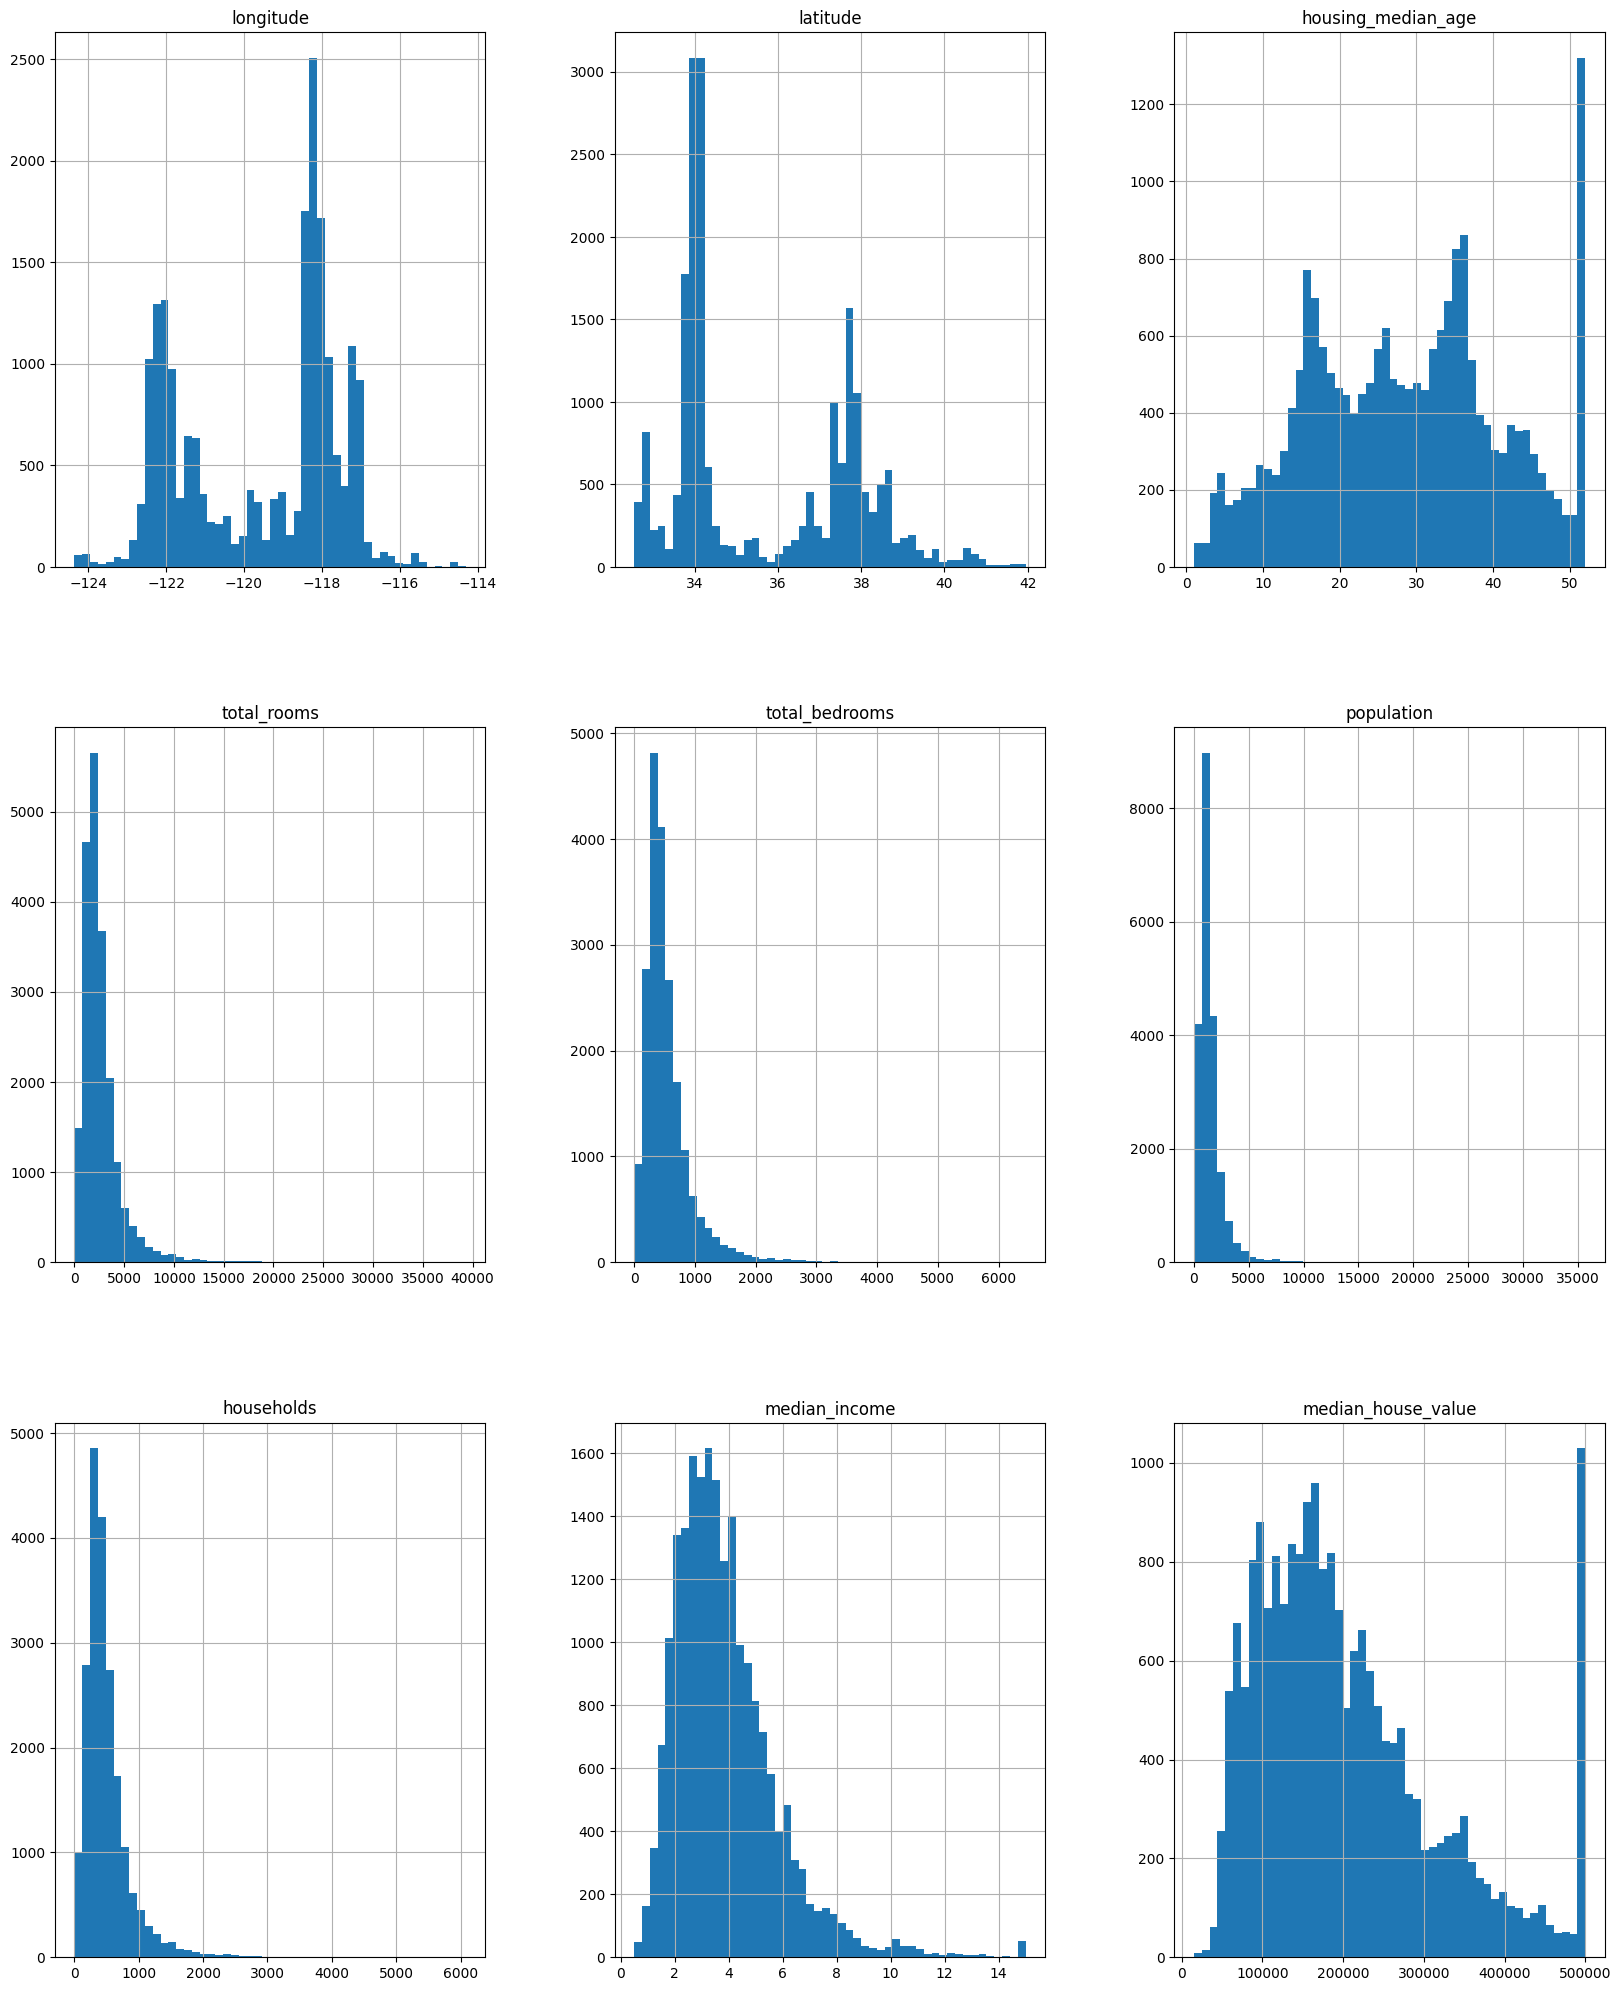

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins = 50, figsize = (20, 25))
plt.show()

**히스토그램을 통한 분석**

1. 먼저 중간 소득 특성이 US 달러로 표현되어 있지 않은 것 같습니다. 데이터를 취합한 팀에 확인해보니 스케일을 조정하고, 상한이 15 (실제로는 15.0001). 하한이 0.5 (실제로는 0.4999 )가 되도록 만들었다고 합니다. 대략 수만 달러를 나타냅니다(예를 들어 3은 실제로 약 30,000달러를 의미합니다). 머신러닝에서는 전처리된 데이터를 다루는 경우가 흔하고 이것이 문제가 되지는 않지만 데이터가 어떻게 계산된 것인지 반드시 이해하고 있어야 합니다.

2. 중간 주택 연도와 중간 주택 가격 역시 최댓값과 최솟값을 한정했습니다. 중간 주택 가격의 경우는 타깃 속성(레이블)으로 사용되기 때문에 심각한 문제가 될 수 있습니다. 가격
이 한곗값을 넘어가지 않도록 머신러닝 알고리즘이 학습될지도 모릅니다. 이것이 문제가 될지 안 될지는 클라이언트팀(이 시스템의 출력을 사용할 팀)과 함께 검토하는 것이 좋습니다. 만약 그 팀에서 $500,000 를 넘어가더라도 정확한 예측값이 필요하다고 한다면 우리가 선택할 수 있는 방법은 두 가지입니다.
    
    a. 한곗값 밖의 구역에 대한 정확한 레이블을 구합니다.

    b. 훈련 세트에서 이런 구역을 제거합니다($500,000가 넘는 값에 대한 예측은 평가 결과가 매우 나쁠 것 이므로 테스트 세트에서도 제거합니다).


3. 특성들의 스케일이 서로 많이 다릅니다. 특성 스케일링에 대해서는 이 장의 뒷부분에서 살펴보겠습니다.

4. 마지막으로 많은 히스토그램의 꼬리가 두껍습니다. 가운데에서 왼쪽보다 오른쪽으로 더 멀리 뻗어 있습니 다. 이런 형태는 일부 머신러닝 알고리즘에서 패턴을 찾기 어렵게 만듭니다. 나중에 이런 특성들을 좀 더 종 모양의 분포가 되도록 변형시키겠습니다.

## 2.3.4 테스트 세트 만들기

**데이터 스누핑 편향** : 테스트 세트로 일반화 오차를 추정하면 매우 낙관적인 추정이 되며 시스템을 론칭했을 때 기대한 성능이 나오지 않는다.

In [20]:
import numpy as np

def split_train_test(data, test_ratio):
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data) * test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

In [21]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)

16512

In [22]:
len(test_set)

4128

위의 프로그램을 다시 실행하면 다른 테스트 세트가 생성된다는 문제가 있음.

**해결책**

1. 처음 실행에서 테스트 세트를 저장하고 다음번 실행에서 이를 불러들이는 것이다.

2. 항상 같은 난수 인덱스가 생성되도록 np.random.permutation()을 호출하기 전에 난수 발생기의 초깃값을 지정하는 것이다.(ex. np.random.seed(42))

하지만 두 해법 모두 다음번에 업데이트된 데이터셋을 사용하려면 문제가 된다.

*즉, 데이터셋을 업데이트한 후에도 안정적인 훈련/테스트 분할을 위한 일반적인 해결책은 샘플의 실별자를 사용하여 테스트 세트로 보낼지 말지 정해야한다.*

ex) 각 샘플마다 식별자의 해시값을 계산하여 해시 최댓값의 20%보다 작거나 같은 샘플만 테스트 세트로 보내게 한다.

In [26]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
  return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2 *32

In [27]:
def split_train_test_by_id(data, test_ratio, id_column):
  ids = data[id_column]
  in_test_set = ids.apply(lambda id_:test_set_check(id_, test_ratio))
  return data.loc[~in_test_set], data.loc[in_test_set]

In [28]:
# 주택 데이터셋에는 식별자 컬럼이 없으므로 행의 인덱스를 ID로 사용
housing_with_id = housing.reset_index()

train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [30]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

사이킷런은 데이터셋을 여러 서브셋으로 나누는 방법을 제공한다.

**train_test_split 특징**

1. 난수 초깃값을 지정할 수 있는 random_state 매개변수가 존재

2. 행의 개수가 같은 여러 개의 데이터셋을 넘겨서 같은 인덱스를 기반으로 나눌 수 있음

In [32]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

**계층적 샘플링** : 샘플링 편향이 생기지 않고 데이터를 나누기

*if, 중간 소득이 중간 주택 가격을 예측하는 데 매우 중요*

&rarr; 테스트 세트가 전체 데이터셋에 있는 여러 소득 카테고리를 잘 대표해야한다.

In [33]:
# 소득으로 카테고리를 형성
housing["income_cat"] = pd.cut(housing["median_income"],
                              bins = [0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels = [1, 2, 3, 4, 5])

<Axes: >

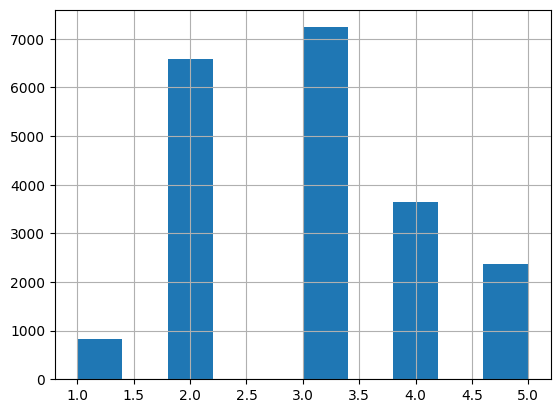

In [34]:
housing["income_cat"].hist()

In [36]:
# 소득 카테고리를 기반으로 계층 샘플링
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

In [38]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [39]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64

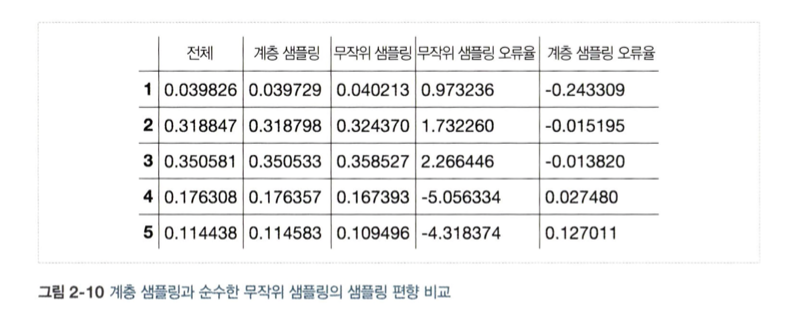

In [40]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop("income_cat", axis = 1, inplace = True)

**테스트 세트 생성에 있어 계층적 샘플링은 아주 중요하다.**

# 2.4 데이터 이해를 위한 탐색과 시각화

In [41]:
housing = strat_train_set.copy()

## 2.4.1 지리적 데이터 시각화

<Axes: xlabel='longitude', ylabel='latitude'>

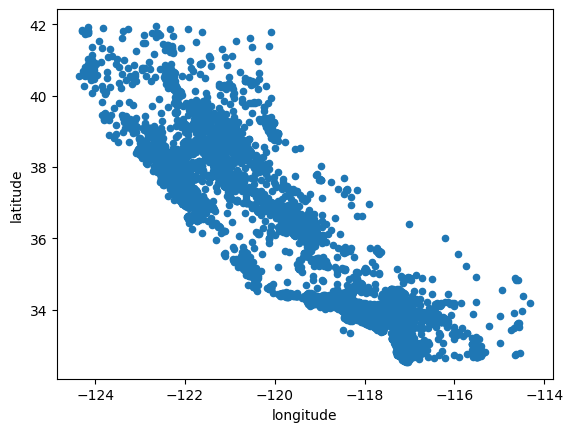

In [42]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

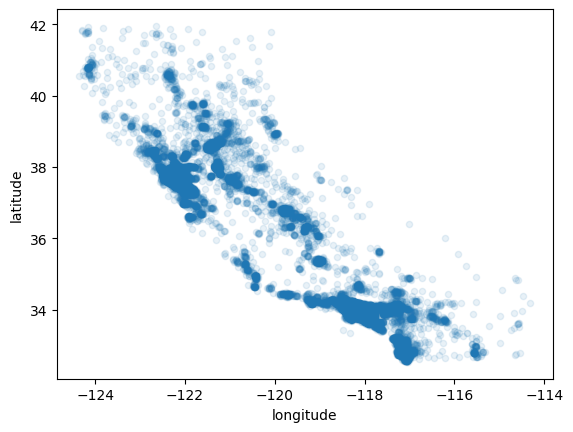

In [43]:
# alpha 옵션을 통해 데이터 포인트가 밀집된 영역을 잘 보여줌
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.1)

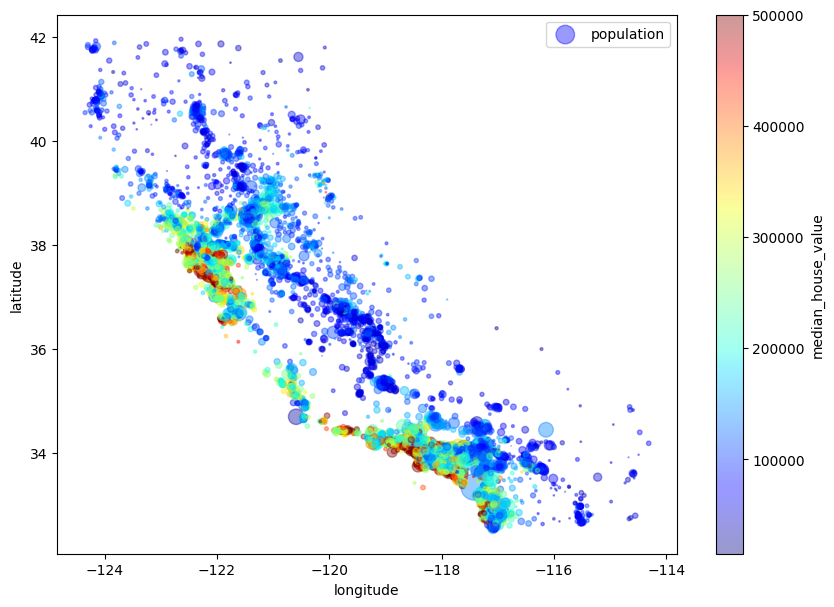

In [44]:
# 원의 반지름 : 구역의 인구
# 색상 : 가격
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.4,
             s = housing["population"]/100, label = "population", figsize = (10, 7),
             c = "median_house_value", cmap = plt.get_cmap("jet"), colorbar = True)
plt.legend()

**분석 결과**

- 주택 가격은 지역과 인구 밀도에 관련이 매우 크다.

&rarr; 군집 알고리즘을 사용해 주요 군집을 찾고 군집의 중심까지 거리를 재는 특성을 추가할 수 있다.

## 2.4.2 상관관계 조사

**표준 상관계수(피어슨의 r)** : 데이터셋이 너무 크지 않으므로 모든 특성 간의 상관관계를 corr() 메서드를 이용해 계산

In [45]:
corr_matrix = housing.corr()

<ipython-input-45-bac487469033>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


In [47]:
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

상관관계의 범위는 -1부터 1까지 입니다.
- 계수가 1에 가까우면 강한 양의 상관관계를 가진다.

- 계수가 -1에 가까우면 강한 음의 상관관계를 가진다.

- 계수가 0에 가까우면 선형적인 상관관계가 없다.

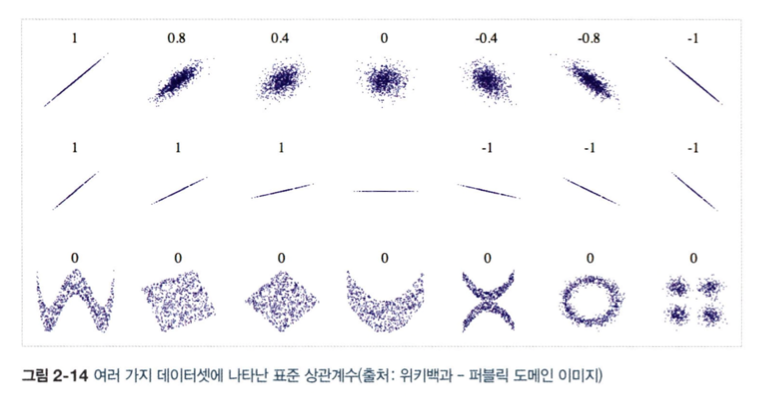

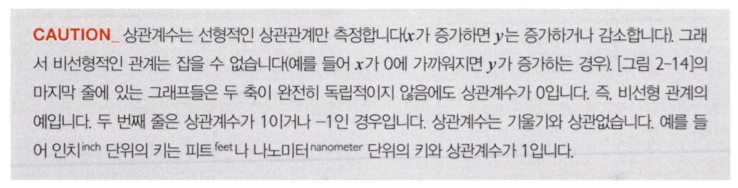

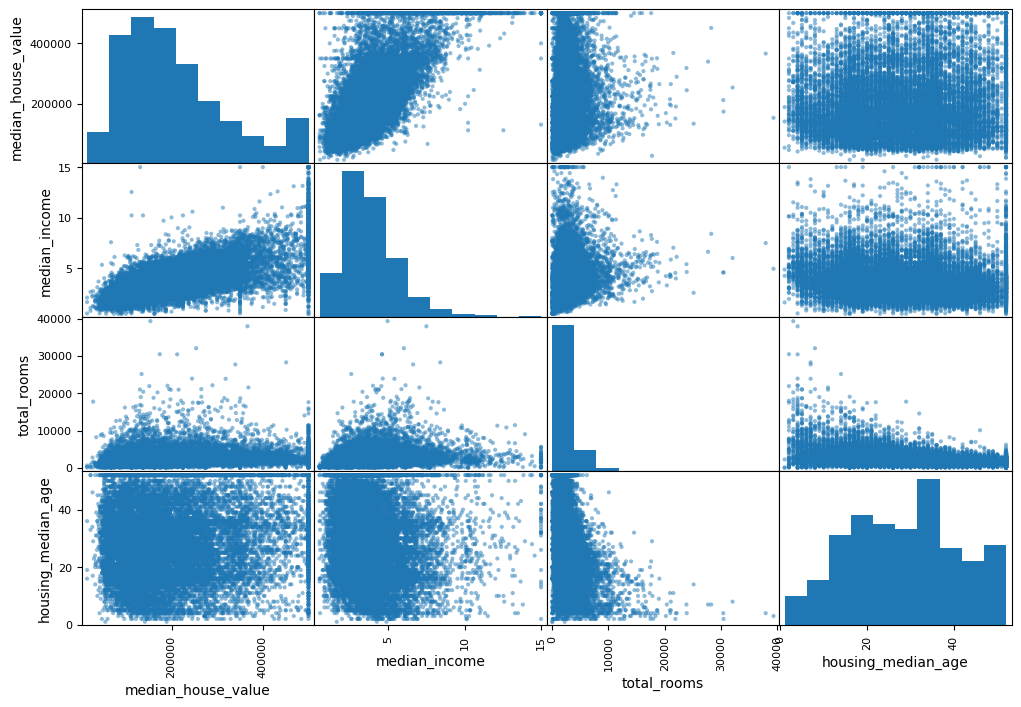

In [50]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize = (12, 8))
plt.show()

대각선 방향(왼쪽 위에서 오른쪽 아래로)은 각 변수 자신에 대한 것이라 그냥 직선이 되므로 유용하지 않다.

**중간 주택 가격(median_house_value)을 예측하는 데 중간 소득(median_income)이 가장 유용하다.**

<Axes: xlabel='median_income', ylabel='median_house_value'>

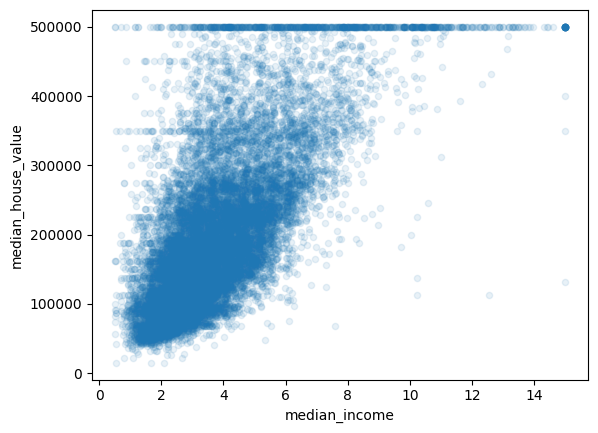

In [51]:
housing.plot(kind = "scatter", x = "median_income", y = "median_house_value", alpha = 0.1)

**산점도 분석**

- 위쪽으로 향하는 경향으로 포인트들이 너무 널리 퍼져 있지 않으므로 상관관계가 매우 강하다.

- 가격 제한값이 $500,000에서 수평선으로 잘 보인다.

- \$450,000 근처와 \$350,000와 $280,000에도 있고 그 아래 조금 더 수평선이 잘 보인다.

&rarr; 알고리즘이 데이터에서 이런 이상한 형태를 학습하지 않도록 해당 구역을 제거하는 것이 좋다.

## 2.4.3 특성 조합으로 실험

머신러닝 알고리즘용 데이터를 준비하기 전에 마지막으로 해볼 수 있는 것은 여러 특성의 조합을 시도해보는 것이다.

**Example**

- 특정 구역의 방 개수는 얼마나 많은 가구 수가 있는 지보다 한 가구당 방의 개수가 더 중요하다.

- 전체 침대 개수보다 방의 개수당 침대의 개수가 더 유용하다.

- 가구당 인원

In [52]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [53]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

<ipython-input-53-d960717deba4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

- 새로운 bedroos_per_room 특성은 전체 방 개수나 침대 개수보다 중간 주택 가격과의 상관관계가 훨씬 높다.

- 침대/방의 비율이 낮은 집은 더 비싼 경향이 있다.

- 가구당 방 개수도 구역 내 전체 방 개수보다 더 유용하다.